# BACKGROUND


The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by consumers. In this project, we aim to develop a machine learning model that may be able to detect possible fraudulent consumers. 

We are provided with 4 different csv files, which comprises of pre-split train and test data:
- client_train.csv
- client_test.csv
- invoice_train.csv
- invoice_test.csv

In this notebook, we conduct our data cleaning and exploratory data analysis process on the datasets, to prepare them for the next stage of model building. We use exploratory data analysis to draw possible insights and trends on how certain features may be more relevant as potential indicators of fraud, as well as to address or validate possible assumptions we may have in understanding the data and the business problem. With that, it helps ensure we clean our data well too.

# Importing Packages and Datasets

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing train datasets
client_train = pd.read_csv("./data/client_train.csv")
invoice_train = pd.read_csv("./data/invoice_train.csv")

display(client_train.head())
display(invoice_train.head())

/var/folders/cp/wwrr0w2x0vx65m4p2z4bn_080000gn/T/ipykernel_85186/2179069105.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv("./data/invoice_train.csv")


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [3]:
# Importing test datasets
client_test = pd.read_csv("./data/client_test.csv")
invoice_test = pd.read_csv("./data/invoice_test.csv")

display(client_test.head())
display(invoice_test.head())

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


# Data Inspection and cleaning

Here are the general descriptions provided on the dataset:

client_train column descriptions:
- disrict: district where the client is
- client_id: unique id for client
- client_catg: category client belongs to
- region: area where the client is
- creation_date: date client joined
- target: fraud:1, not fraud:0

invoice train column descriptions:
- client_id: unique id for client
- invoice_date: date of the invoice
- tarif_type: type of tax
- counter_number: number
- counter_statue: takes up to 5 values such as working fine, not working, on hold statue, etc
- counter_code: code 
- reading_remarque: notes that the STEG agent takes during his visit to the client (e.g if the counter shows something wrong..)
- counter_coefficient: an additional coefficient to be added when standard consumption is exceeded
- consommation_level_1 to 4: consumption levels 1 to 4
- old_index: old index
- new_index: new index
- months_number: month number
- counter_type: type of counter

Some of the descriptions are not very informative, and may require further visualisation to better understand it. 

Many of the columns in invoice_train are integer type columns, but some of them appear to be categorical in nature according to the given descriptions. We will need to verify this and check them later in the exploratory data analysis.

In [4]:
print(invoice_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB
None


Similarly, client_train contains several integer type / float type columns, but may be categorical in nature according to the given descriptions (disrict & region). Our target variable is already label encoded. Additionally, client_id is a unique key that allows for mapping between information of client data and invoice rows for each clien in the invoice data. 

In [5]:
print(client_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB
None


## Removing duplicates and missing 

To start off data cleaning, we first identify if there are any missing values in the datasets to ensure data integrity and accuracy, so that there may not be biases in incomplete model trainig. There are no missing values in our train datasets.

In [6]:
# Identifying if there are any missing values
print("Missing values in client_train: ", client_train.isnull().sum().sum())
print("Missing values in invoice_train: ", invoice_train.isnull().sum().sum())

Missing values in client_train:  0
Missing values in invoice_train:  0


Likewise, we do the same in removing duplciated rows for consistency and bias reduction so that there are no over representation of certain data points, especially since each data maps uniquely to a client_id. We remove 11 duplicated rows from invoice_train. There are no duplicated rows in the client_train dataset.

In [7]:
# Check for duplicated rows in invoice_train
duplicated_rows = invoice_train[invoice_train.duplicated()]
print(f"Number of duplicated rows in invoice_train: {len(duplicated_rows)}")
display(duplicated_rows)

# Check for duplicated rows in client_train
duplicated_rows = client_train[client_train.duplicated()]
print(f"Number of duplicated rows in client_train: {len(duplicated_rows)}")
display(duplicated_rows)

Number of duplicated rows in invoice_train: 11


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
951893,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,0,0,13680,13680,2,ELEC
1755798,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,0,0,0,0,2,GAZ
2137999,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,0,0,623,623,2,GAZ
2163374,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,0,0,99429,99429,2,ELEC
2433919,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,0,0,0,0,2,ELEC
2805729,train_Client_54609,2010-04-06,11,200912,5,207,6,1,0,0,0,0,0,0,2,ELEC
3260191,train_Client_66981,2006-07-17,11,132701,5,420,6,1,0,0,0,0,5946,5946,2,ELEC
3260198,train_Client_66981,2006-07-17,11,132701,5,420,6,1,0,0,0,0,5946,5946,2,ELEC
3394719,train_Client_7066,2014-10-28,40,4463323,5,5,6,1,0,0,0,0,80,80,2,GAZ
3462929,train_Client_72519,2013-01-21,11,246464,5,203,6,1,0,0,0,0,2954,2954,2,ELEC


Number of duplicated rows in client_train: 0


,disrict,client_id,client_catg,region,creation_date,target


In [8]:
print(f"No. of rows before removing duplicates: {invoice_train.shape[0]}")
# Removing duplicated rows
invoice_train.drop_duplicates(inplace=True)
print(f"No. of rows after removing duplicates: {invoice_train.shape[0]}")

No. of rows before removing duplicates: 4476749
No. of rows after removing duplicates: 4476738


## Renaming of columns and label encoding

For the invoice_train dataset, we label encode counter_type to represent electricity as 0 and gas as 1 for consistency across the dataset. 

We also rename columns in the invoice_train dataset for better interpretability of our results later on. For instance, we renamed all 'counters' to 'meter' as we felt that made more sense to us. We also translated and renamed words back to their english versions.

In [9]:
# Map counter_type to binary values
invoice_train['counter_type'] = invoice_train['counter_type'].map({'ELEC': 0, 'GAZ': 1})

# Rename invoice_train columns for better clarity and interpretability
invoice_train.rename(columns={'counter_number': 'meter_number',
                              'counter_statue': 'meter_status',
                              'counter_code': 'meter_code',
                              'counter_coefficient': 'meter_coefficient',
                              'counter_type': 'meter_type',
                              'reading_remarque': 'reading_remark',
                              'consommation_level_1': 'consumption_level_1',
                              'consommation_level_2': 'consumption_level_2',
                              'consommation_level_3': 'consumption_level_3',
                              'consommation_level_4': 'consumption_level_4'}, inplace=True)

display(invoice_train.head())

,client_id,invoice_date,tarif_type,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,meter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,0


For the client_train dataset, we renamed target to fraud_status for better interpretability, and fixed the spelling error in district.

In [10]:
# Rename the target column to fraud_status and district column to disrict
client_train.rename(columns={'target': 'fraud_status',
                             'disrict': 'district'}, inplace=True)

display(client_train.head())

,district,client_id,client_catg,region,creation_date,fraud_status
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


## Datetime Formats

We convert invoice_data and creation_date to datetime formats for the purposes of transformations and visualisations later on.

In [11]:
# Convert datetime formats
invoice_train['invoice_date'] = pd.to_datetime(invoice_train['invoice_date'])
client_train['creation_date'] = pd.to_datetime(client_train['creation_date'])

/var/folders/cp/wwrr0w2x0vx65m4p2z4bn_080000gn/T/ipykernel_85186/2928286413.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  client_train['creation_date'] = pd.to_datetime(client_train['creation_date'])


## Client_id

There are a consistent no. of clients in both datasets, which amount to 135493 clients in total. There are no missing client IDs in either dataset and we will be able to map client_id across datasets appropriately.

In [12]:
# Finding the no. of unique clients in the dataset
print("No. of unique clients in client_train: ", client_train['client_id'].nunique())
print("No. of unique clients in invoice_train: ", invoice_train['client_id'].nunique())

# Identifying if there are any unique clients only in either dataset
clients_client_train = set(client_train['client_id'])
clients_invoice_train = set(invoice_train['client_id'])

print("No. of clients only in client_train: ", len(clients_client_train - clients_invoice_train))
print("No. of clients only in invoice_train: ", len(clients_invoice_train - clients_client_train))

No. of unique clients in client_train:  135493
No. of unique clients in invoice_train:  135493
No. of clients only in client_train:  0
No. of clients only in invoice_train:  0


# Exploratory Data Analysis

Here, we further inspect the variables given in the dataset. Primarily, we want to observe if any possible further cleaning is required for outlier values, as well as better understand our data distributions to see which features might be more apparent in fraudulent customers.

For label-encoded categorical variables (the bulk of our variables), we need to dive into each possible encoded values that they might take since checking of outliers is generally not applicable in the same way it is for numerical data - such as interquartile ranges etc. They are not continuous or ordinal numbers where "extreme values" could be identified. Since it is unclear as to what months_number might mean, we also take a look at it here in both the categorical sense and numerical sense.

Based on the no. of unique values that each column might take, we can confirm that tarif_type, meter_code, reading_remark, meter_type, meter_coefficient and meter_status are categorical label-encoded variables. Meter_status however, appears to take on other values (both strings and integers) than given in the description so more cleaning will be required later on.

Meter_number might be a key or category, and it is hard to discern what months_number might be at this point. At present, we are leaning towards the assumption that it is numerical.

In [13]:
# Identifying the no. of unique values in each column of invoice_train
print(f"{invoice_train['tarif_type'].nunique()} unique values in tarif_type column: ", invoice_train['tarif_type'].unique())
print(f"{invoice_train['meter_number'].nunique()} unique values in meter_number column: ", invoice_train['meter_number'].unique())
print(f"{invoice_train['meter_status'].nunique()} unique values in meter_status column: ", invoice_train['meter_status'].unique())
print(f"{invoice_train['meter_code'].nunique()} unique values in meter_code column: ", invoice_train['meter_code'].unique())
print(f"{invoice_train['reading_remark'].nunique()} unique values in reading_remark column: ", invoice_train['reading_remark'].unique())
print(f"{invoice_train['meter_coefficient'].nunique()} unique values in meter_coefficient column: ", invoice_train['meter_coefficient'].unique())
print(f"{invoice_train['months_number'].nunique()} unique values in months_number column: ", invoice_train['months_number'].unique())
print(f"{invoice_train['meter_type'].nunique()} unique values in meter_type column: ", invoice_train['meter_type'].unique())

17 unique values in tarif_type column:  [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]
201893 unique values in meter_number column:  [1335667  678902  572765 ... 4811719  262195  560948]
16 unique values in meter_status column:  [0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]
42 unique values in meter_code column:  [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]
8 unique values in reading_remark column:  [  8   6   9   7 207 413 203   5]
16 unique values in meter_coefficient column:  [ 1  3  0 10  4 33 50 20  2  6 40  9 30  5 11  8]
1370 unique values in months_number column:  [     4     12      8 ... 367445 459733 463554]
2 unique values in meter_type column:  [0 1]


Region and district are confirmed to be categorical variables.

In [14]:
# Identifying the no. of unique values in each column of client_train
print(f"{client_train['region'].nunique()} unique values in region column: ", client_train['region'].unique())
print(f"{client_train['district'].nunique()} unique values in district column: ", client_train['district'].unique())

25 unique values in region column:  [101 107 301 105 303 103 309 311 304 104 312 305 306 308 372 307 313 310
 371 302 106 379 399 206 199]
4 unique values in district column:  [60 69 62 63]


From the summary statistics of consumption levels, we can make some interesting observations.

- consumption_level_2 and 3 and 4 are mostly 0, up till minimally the 75% quartile.
- for all consumption_levels, the max value seems extremely high, there may be presence of outliers.
- old_index and new_index appear to have very high max values as well.
- months_number is mostly 4 up till minimally the 75% quartile, more visualisation will be required.

In [15]:
# Changing the format of showing the float numbers
pd.options.display.float_format = '{:.2f}'.format

# Summary statistics of the numerical columns in invoice_train
display(invoice_train[['consumption_level_1', 'consumption_level_2',
                       'consumption_level_3', 'consumption_level_4',
                       'old_index', 'new_index', 'months_number']].describe())

,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number
count,4476738.00,4476738.00,4476738.00,4476738.00,4476738.00,4476738.00,4476738.00
mean,410.98,109.32,20.31,52.93,17767.01,18349.72,44.83
std,757.31,1220.12,157.42,875.47,40366.95,40953.23,3128.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,79.00,0.00,0.00,0.00,1791.00,2056.00,4.00
50%,274.00,0.00,0.00,0.00,7690.00,8192.00,4.00
75%,600.00,0.00,0.00,0.00,21660.00,22343.00,4.00
max,999910.00,999073.00,64492.00,547946.00,2800280.00,2870972.00,636624.00


## Target fraud_status variable 

Next, we understand the distribution of our target variable, which refers to whether the client is fradulent or not. 94.42% of the clients are classified as non-fraudulent, while 5.58% are classified as fraudulent. Such imbalance in data is expected due to the nature of the problem, where majority of the clients are likely to be good clients that utilise their gas and electricity appropriately. With such imbalances, we will need to approach model building after data cleaning more carefully to avoid or reduce bias, through methods such as oversampling or undersampling.

As we explore the other column variables, it is important to take note of such imbalances.

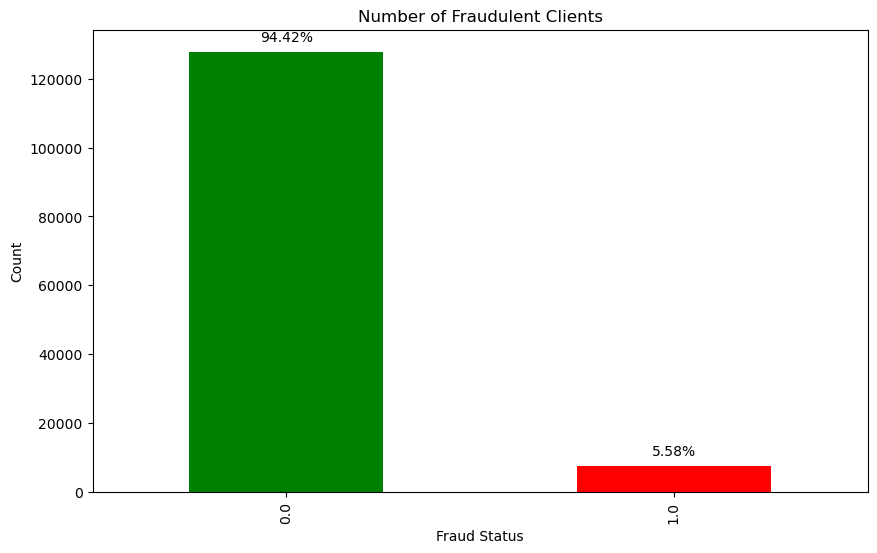

In [16]:
plt.figure(figsize=(10, 6))

# Count the occurrences of each fraud_status
fraud_counts = client_train['fraud_status'].value_counts()

# Define colors based on the index
colors = ['green' if index == 0 else 'red' for index in fraud_counts.index]

# Create the bar plot
ax = fraud_counts.plot(kind='bar', color=colors)
plt.title('Number of Fraudulent Clients')
plt.xlabel('Fraud Status')
plt.ylabel('Count')

# Adding percentage on top of the bars
total = len(client_train)
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Region

We observe the distribution of fraud statuses in the region. There appears to be a relatively even proportion of fraud cases across the board, except for region 199, 206 and 399.

<Figure size 1000x1000 with 0 Axes>

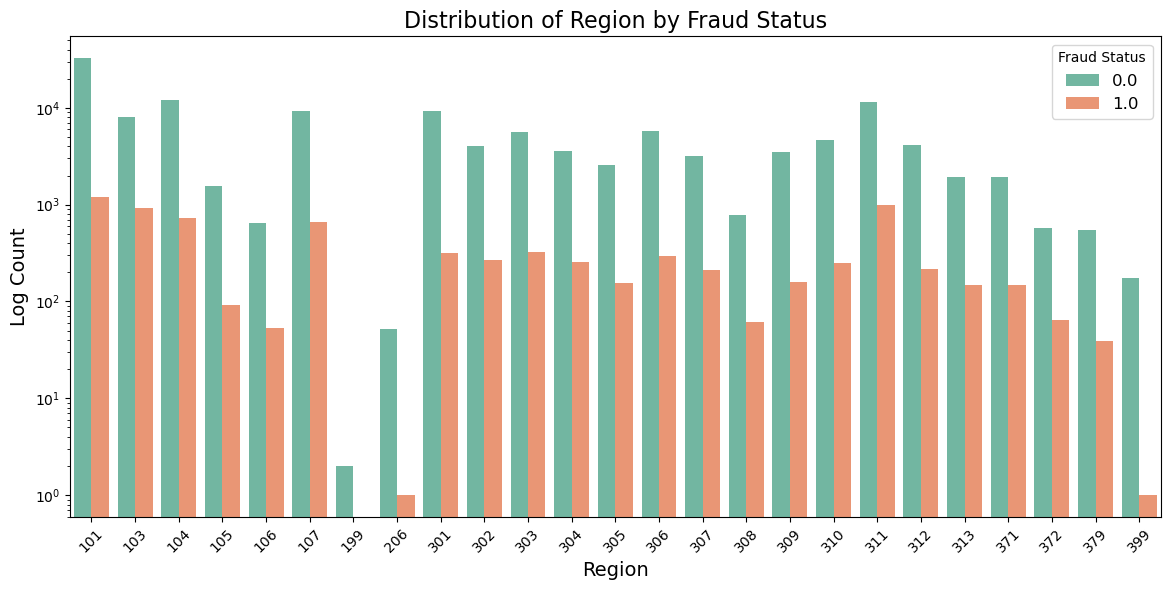

In [17]:
# Distribution of meter_status and fraud_status
plt.figure(figsize=(10, 10))
plot_data = client_train.groupby(['region', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="region",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Region by Fraud Status", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Fraud Status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

## District

It appears that District 60 has a slightly lower amount of fraud cases compared to the other districts. Generally, there is a low proportion of fraud cases to the total client population within each district.

<Figure size 1000x1000 with 0 Axes>

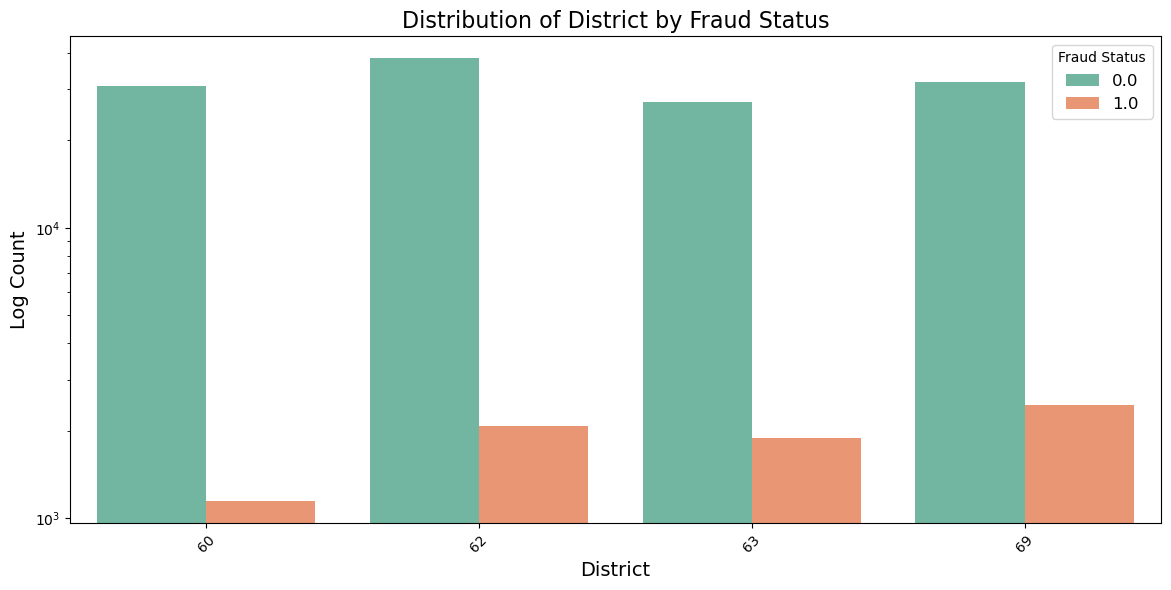

In [18]:
# Distribution of meter_status and fraud_status
plt.figure(figsize=(10, 10))
plot_data = client_train.groupby(['district', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="district",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of District by Fraud Status", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Fraud Status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

## Tarif Type

We observe the distribution of tarif_type using barplots. Certain tarif types, such as 18, 24, 27, and 42, show strong associations with fraud or non-fraud status. While these patterns may guide the model, it is important to ensure generalization beyond these cases. There are low occurences of these tarif types with unique fraud statuses, which are acceptable.

<Figure size 1000x1000 with 0 Axes>

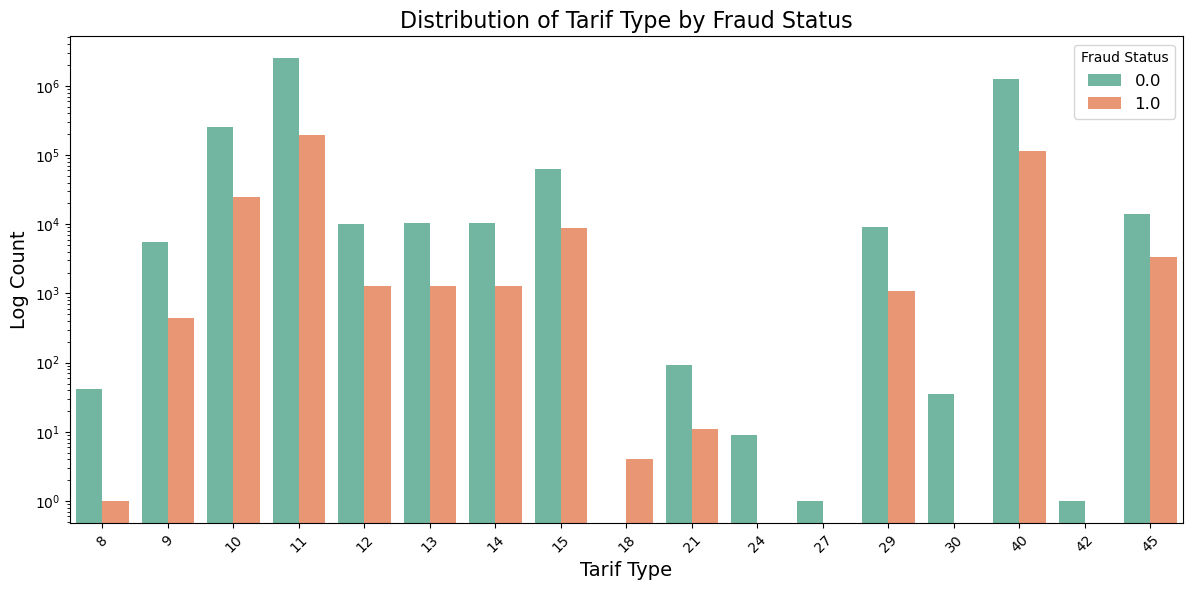

In [19]:
# Looking at the distribution of fraud_status for each meter_status
temp_df = pd.merge(invoice_train[['client_id', 'tarif_type']], client_train[['client_id', 'fraud_status']], on='client_id')

# Distribution of meter_status and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['tarif_type', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="tarif_type",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Tarif Type by Fraud Status", fontsize=16)
plt.xlabel("Tarif Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Fraud Status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

There are is less likely occurence of clients with multiple tarif types, especially for 3 tarif types and above. However, based on the distribution, it appears that having more unique tarif types does not necessarily indicate potentialy fraudulent behaviour.

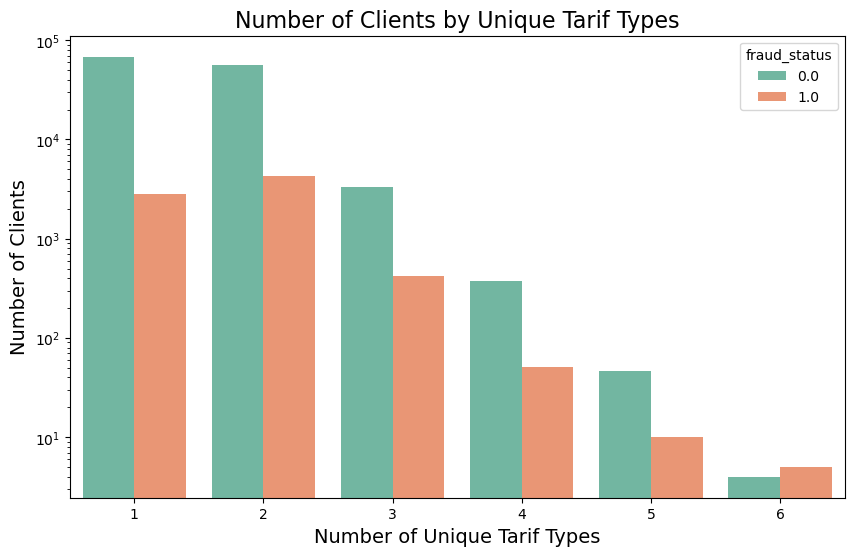

In [20]:
# Looking at the distribution of tarif_type per client
unique_tarif_type_per_client = invoice_train.groupby('client_id')['tarif_type'].nunique()

# Get the number of clients with fraud status
tarif_type_counts_df = unique_tarif_type_per_client.to_frame().reset_index()
tarif_type_counts_df = tarif_type_counts_df.merge(client_train[['client_id', 'fraud_status']], on='client_id', how='left')

plot_df = tarif_type_counts_df.groupby(['tarif_type', 'fraud_status']).size().reset_index(name='count')

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='tarif_type', y='count', hue='fraud_status', data=plot_df, palette='Set2')
plt.title('Number of Clients by Unique Tarif Types', fontsize=16)
plt.xlabel('Number of Unique Tarif Types', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.yscale('log')
plt.show()

## Meter Number

Previously, we had assumed that meter number might be a unique key for each meter. We plotted a bargraph to view how many different meter numbers each client uses, which ranges from 1 to 8. For clients with 7 or 8 different meter numbers, they are observed to be non-fraudulent clients. Apart from this association, it generally appears that there is no clear distinction on how meter_number might indicate fraud. This also means that should our assumption be correct, meters might be shared among different clients.

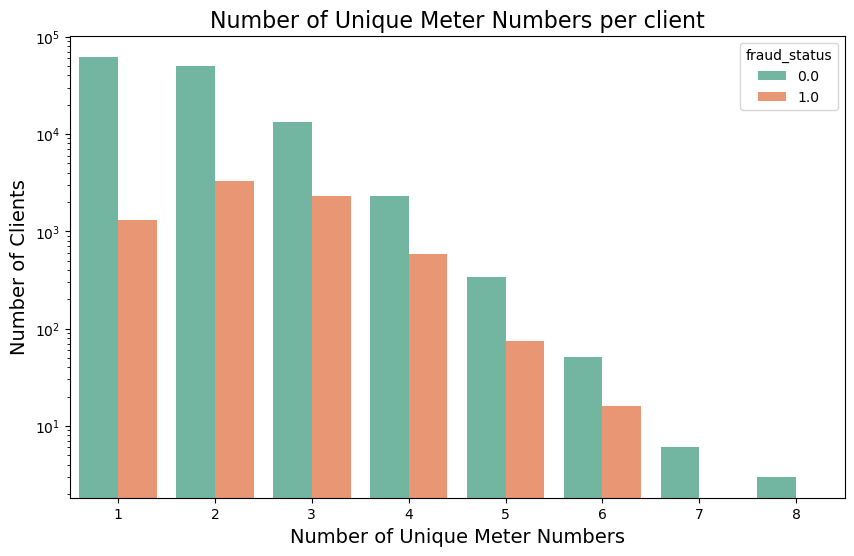

In [21]:
# Calculate the number of unique meter_numbers per client
unique_meter_numbers_per_client = invoice_train.groupby('client_id')['meter_number'].nunique()

# Get the number of clients with fraud status
unique_meter_numbers_per_client_df = unique_meter_numbers_per_client.to_frame().reset_index()
unique_meter_numbers_per_client_df = unique_meter_numbers_per_client_df.merge(client_train[['client_id', 'fraud_status']], on='client_id', how='left')

plot_df = unique_meter_numbers_per_client_df.groupby(['meter_number', 'fraud_status']).size().reset_index(name='count')

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='meter_number', y='count', hue='fraud_status', data=plot_df, palette='Set2')
plt.title('Number of Unique Meter Numbers per client', fontsize=16)
plt.xlabel('Number of Unique Meter Numbers', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.yscale('log')
plt.show()

Similarly, we took a look at how many possible clients each meter number might be tied to. We observe that there is a skew - there is two particular meter numbers that are tied to 387 and 4762 different clients respectively. This reaffirms our assumption that meters might be shared among different clients, and it might be for many different clients at once. 

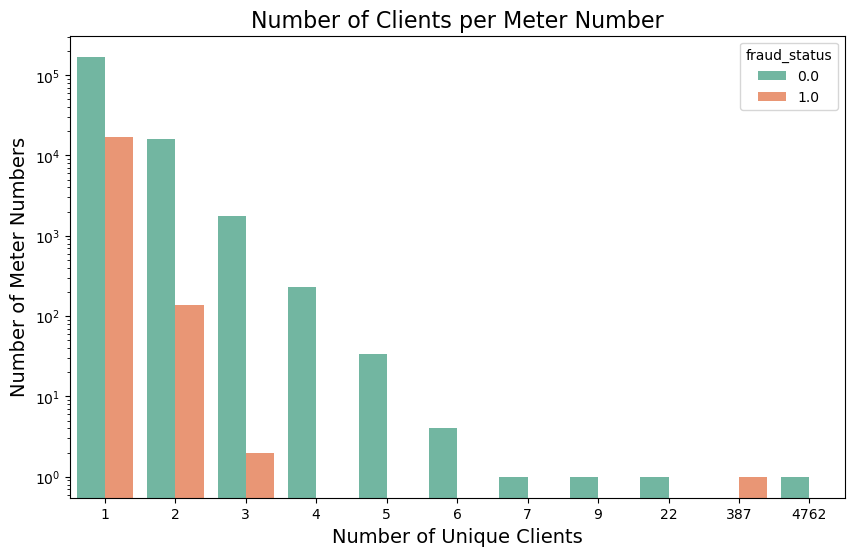

In [22]:
temp_df = pd.merge(invoice_train[['client_id', 'meter_number']], client_train[['client_id', 'fraud_status']], on='client_id')

# Calculate the number of unique clients per meter_number
unique_clients_per_meter_number = temp_df.groupby(['meter_number', 'fraud_status'])['client_id'].nunique()

# # Get the number of clients wper meter_number per fraud status
unique_clients_per_meter_number_df = unique_clients_per_meter_number.to_frame().reset_index()

plot_df = unique_clients_per_meter_number_df.groupby(['client_id', 'fraud_status']).size().reset_index(name='count')

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='client_id', y='count', hue='fraud_status', data=plot_df, palette='Set2')
plt.title('Number of Clients per Meter Number', fontsize=16)
plt.xlabel('Number of Unique Clients', fontsize=14)
plt.ylabel('Number of Meter Numbers', fontsize=14)
plt.yscale('log')
plt.show()

## Meter Status

Earlier, we see that there are both integers and strings in meter_status. Firstly, we make the assumption that the strings are equivalent to their integer counterparts, and make the changes accordingly for string type numbers into integers.

In [23]:
# Converting the counter_statue numerical values to categorical values
invoice_train['meter_status'] = invoice_train['meter_status'].map({"0": 0, "5": 5, "1": 1, "4": 4}).fillna(invoice_train['meter_status'])

# Identifying the no. of occurences of each counter_statue type
print(invoice_train['meter_status'].value_counts())

meter_status
0         4379008
1           74036
5           20628
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64


As it was given that meter_status takes up to 5 different values, it is strange that it takes so many different values. At first glance, the odd ones out are "A" and the larger numbers 46, 618, 769, 420, 269375. We plot a barplot of fraud_status for each meter_status to observe the distribution of each value. There are no fradulent clients that contain meter_status values for the larger values and "A". 

0 to 5 are also 6 unique values, which mean that one of these values are incorrect. It is hard to tell which of these represent the incorrect one. The distribution suggests that value of 2 is likely to be the incorrect one since it has the lowest counts (within the range of the other outlier values as well). However, we feel that since there is an extremely high count of 0s, it is likely that meter_status starts from 0 and ends at 4 because of logical ordering, and that 5 is the incorrect one.

<Figure size 1000x1000 with 0 Axes>

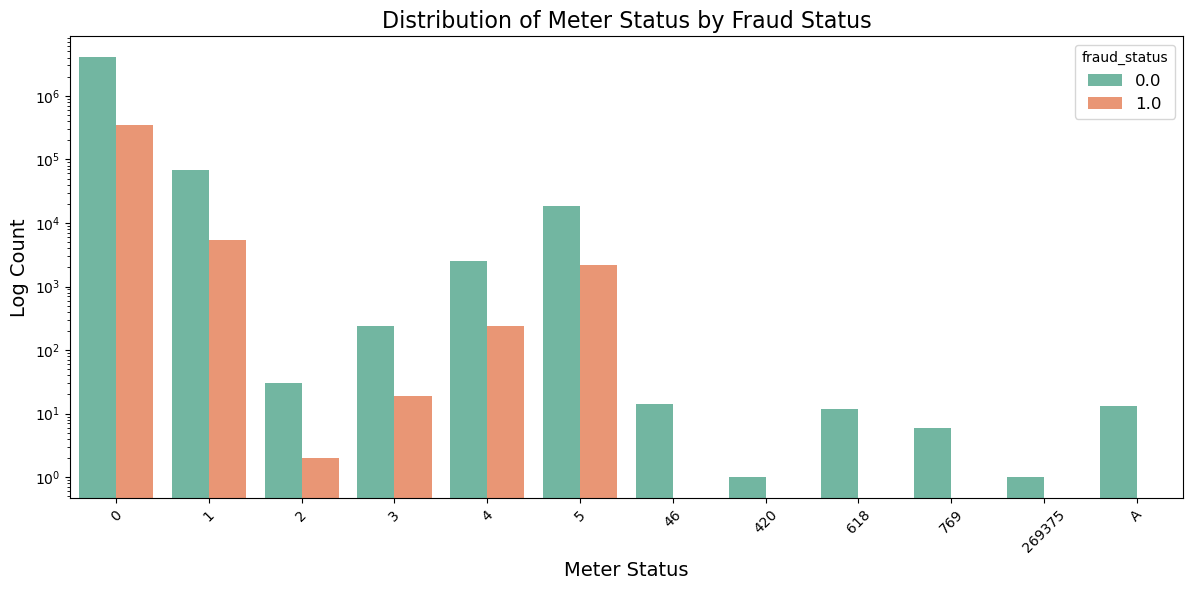

In [24]:
# Looking at the distribution of fraud_status for each meter_status
temp_df = pd.merge(invoice_train[['client_id', 'meter_status']], client_train[['client_id', 'fraud_status']], on='client_id')

# Distribution of meter_status and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['meter_status', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="meter_status",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Meter Status by Fraud Status", fontsize=16)
plt.xlabel("Meter Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="fraud_status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

Due to the lack of information, as well as how the provided dataset was already label encoded to begin with, it is hard to discern even with domain knowledge what are the correct values. As such, we follow the assumption of logical ordering (0 to 4) and the given basis that meter_status contains 5 values to clean this variable.

We remove all values above 5 as well as "A". This is a limitation of the project, and more improvements can be made only should we be able to receive more accurate details about the meters at hand.

In [25]:
# Remove rows with meter_status == A and meter_status >= 5
invoice_train = invoice_train[invoice_train['meter_status'] != 'A']
invoice_train = invoice_train[invoice_train['meter_status'] < 5]

# Identifying the no. of occurences of each counter_statue type
print(invoice_train['meter_status'].value_counts())

meter_status
0    4379008
1      74036
4       2729
3        258
2         32
Name: count, dtype: int64


## Meter Code

We observe the distribution of meter_code using barplots. Certain meter codes, such as 65, 101, 102 etc., show strong associations with fraud or non-fraud status. While these patterns may guide the model, it is important to ensure generalization beyond these cases. There are low occurences of these meter codes with unique fraud statuses, which are acceptable.

<Figure size 1000x1000 with 0 Axes>

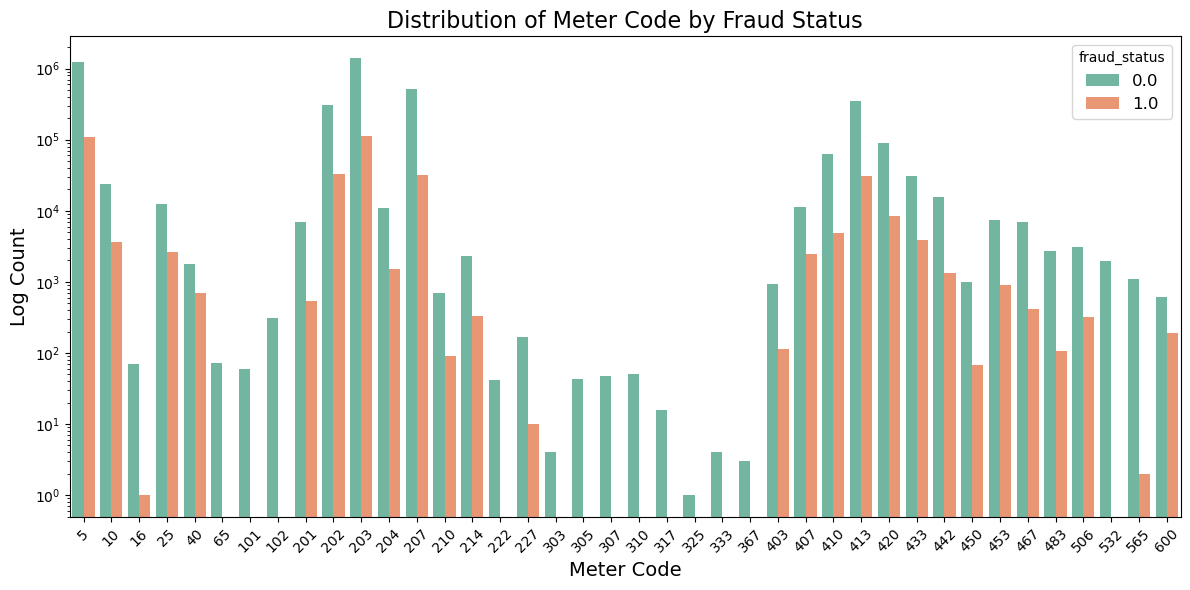

In [26]:
# Looking at the distribution of fraud_status for each meter_code
temp_df = pd.merge(invoice_train[['client_id', 'meter_code']], client_train[['client_id', 'fraud_status']], on='client_id')

# Distribution of meter_code and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['meter_code', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="meter_code",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Meter Code by Fraud Status", fontsize=16)
plt.xlabel("Meter Code", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="fraud_status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

## Reading Remark

Previously, reading remark was observed to take on much larger values, from within these values: [8, 6, 9, 7, 207, 413, 203, 5]. After removing the meter_status values as stated above, the larger values of reading_remark are no longer observed. As for the remaining values, there appears to be a fairly even distribution of fraud to non-fraud clients for different reading remarks, with the exception of reading remark value of 7.

<Figure size 1000x1000 with 0 Axes>

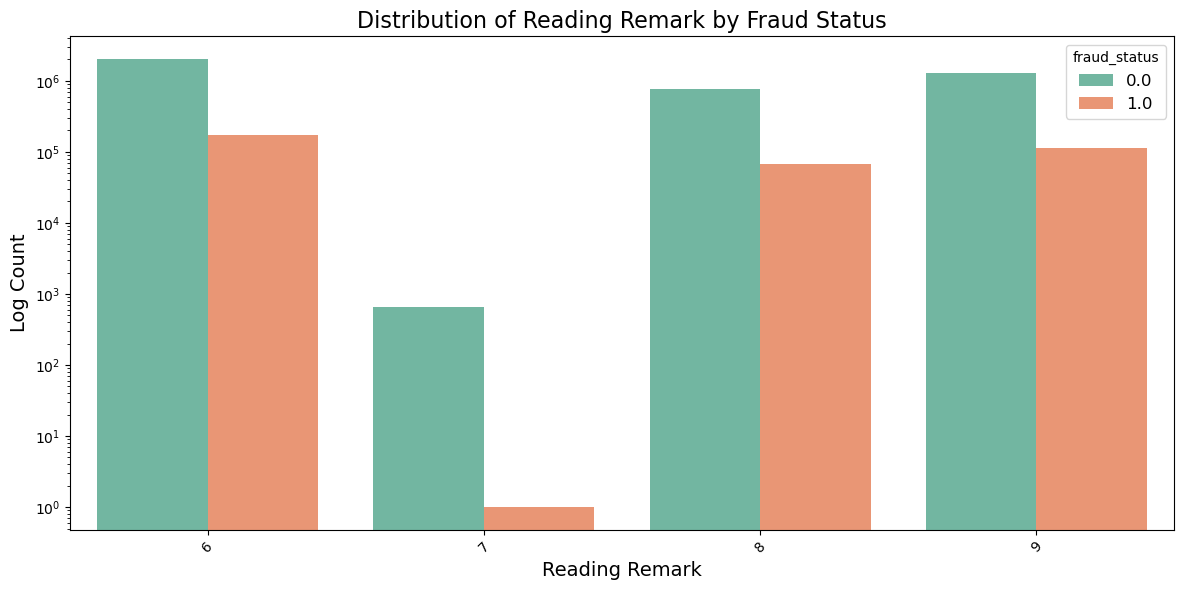

In [27]:
# Looking at the distribution of fraud_status for each meter_code
temp_df = pd.merge(invoice_train[['client_id', 'reading_remark']], client_train[['client_id', 'fraud_status']], on='client_id')

# Distribution of reading_remark and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['reading_remark', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="reading_remark",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Reading Remark by Fraud Status", fontsize=16)
plt.xlabel("Reading Remark", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="fraud_status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

## Meter Coefficient

Based on the distribution of meter coefficient by fraud status, the most prevalent meter coefficient is 1, accounting for a large proportion of both fraudulent and non-fraudulent clients. This might make it a strong feature for model training, however, care may need to be taken to prevent overfitting the model to this dominant feature. Binning or categorising meter coefficients might be more relevant for possible feature engineering or future work. 

<Figure size 1000x1000 with 0 Axes>

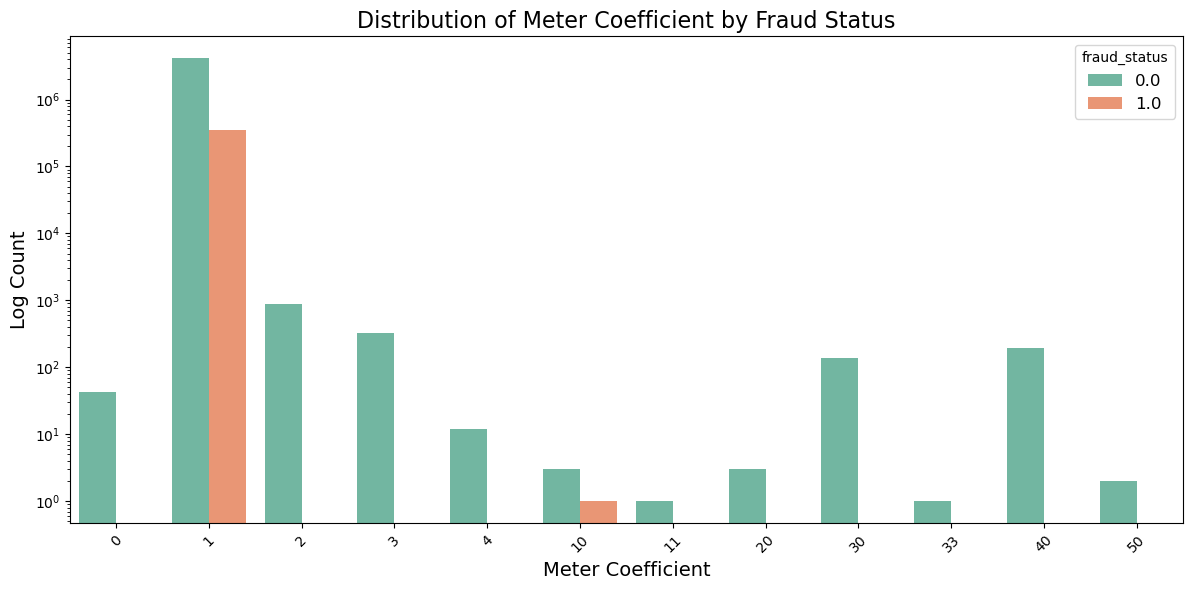

In [28]:
# Looking at the distribution of fraud_status for each meter_coefficient
temp_df = pd.merge(invoice_train[['client_id', 'meter_coefficient']], client_train[['client_id', 'fraud_status']], on='client_id')

# Distribution of meter_coefficient and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['meter_coefficient', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="meter_coefficient",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Meter Coefficient by Fraud Status", fontsize=16)
plt.xlabel("Meter Coefficient", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="fraud_status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

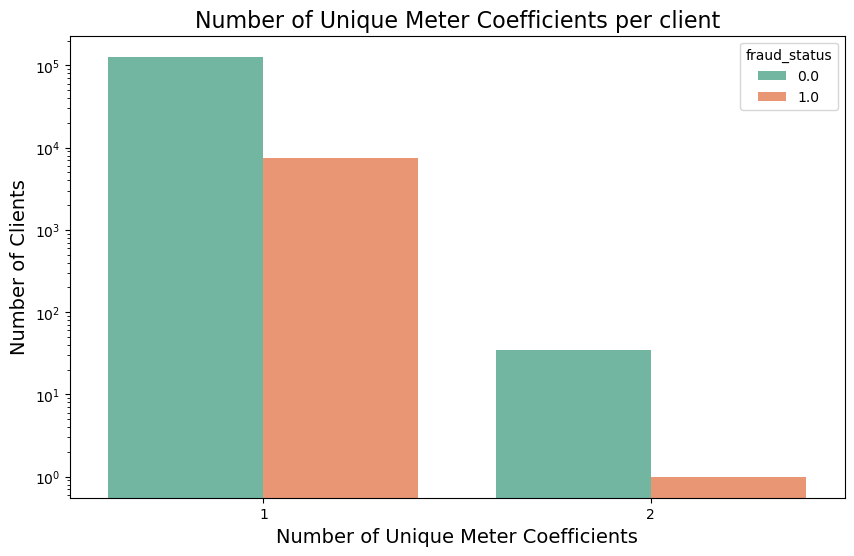

In [29]:
# Calculate the number of unique meter_coefficient per client
unique_meter_coefficient_per_client = invoice_train.groupby('client_id')['meter_coefficient'].nunique()

# Get the number of clients with fraud status
unique_meter_coefficient_per_client_df = unique_meter_coefficient_per_client.to_frame().reset_index()
unique_meter_coefficient_per_client_df = unique_meter_coefficient_per_client_df.merge(client_train[['client_id', 'fraud_status']], on='client_id', how='left')

plot_df = unique_meter_coefficient_per_client_df.groupby(['meter_coefficient', 'fraud_status']).size().reset_index(name='count')

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='meter_coefficient', y='count', hue='fraud_status', data=plot_df, palette='Set2')
plt.title('Number of Unique Meter Coefficients per client', fontsize=16)
plt.xlabel('Number of Unique Meter Coefficients', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.yscale('log')
plt.show()

## Months Number

Since there was no description provided for months_number, we had some initial suspicions were that it was the difference between each reading for each client. However, that was not the case after doing a check on the invoice_dates. Furthermore, the boxplot of months_number is extremely skewed with majority of it having a value of 4, given by how up to at least 75% of the data is just 4. At this junction, how meaningufl months_number might be is unknown. Possible feature engineering might include capturing mean and standard deviations per client, and based on each model later on in the development process.

In [30]:
check_months_df = invoice_train.sort_values(["client_id", "invoice_date"])

# Ensure `invoice_date` is in datetime format & create a new column `year-month`
check_months_df['invoice_date'] = pd.to_datetime(check_months_df['invoice_date'])
check_months_df["year-month"] = check_months_df["invoice_date"].dt.to_period("M")

# Calculate the difference in months
check_months_df['month_diff'] = check_months_df.groupby("client_id")['year-month'].diff().apply(lambda x: x.n if pd.notnull(x) else None)

# Check if the difference in months is equal to the `months_number`
check_months_df["months_check"] = check_months_df["month_diff"] == check_months_df["months_number"]

print(f"No. of invoices with consistent months_number: {sum(check_months_df['months_check'])}/{len(check_months_df)}")

No. of invoices with consistent months_number: 1260470/4456063


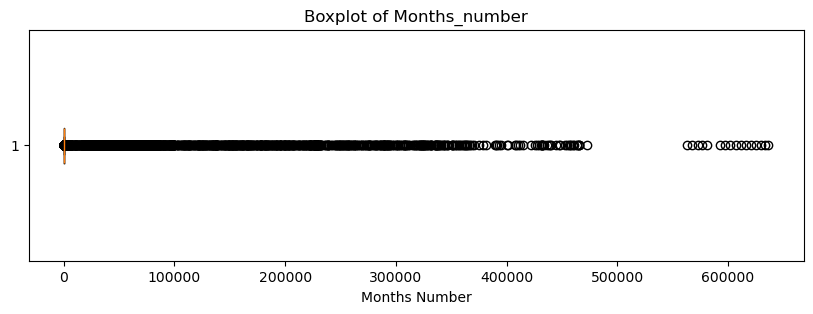

In [31]:
# Plotting of boxplot
plt.figure(figsize=(10, 3))
plt.boxplot(invoice_train["months_number"].dropna(), vert=False)
plt.xlabel("Months Number")
plt.title("Boxplot of Months_number")
plt.show()

## Meter Type

Meter_type reflects the imbalance in fraud_status highlighted earlier, with there being a much lower proportion of fraudulent clients for each meter type.

<Figure size 1000x1000 with 0 Axes>

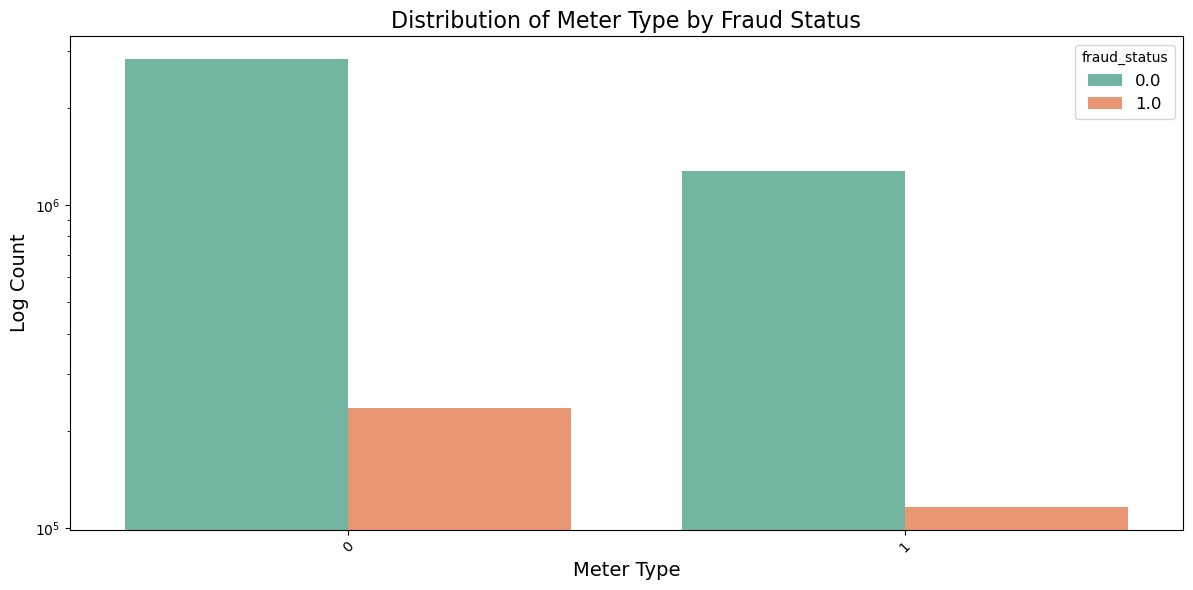

In [32]:
# Looking at the distribution of fraud_status for each meter_type
temp_df = pd.merge(invoice_train[['client_id', 'meter_type']], client_train[['client_id', 'fraud_status']], on='client_id')

# Distribution of meter_type and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['meter_type', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="meter_type",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Meter Type by Fraud Status", fontsize=16)
plt.xlabel("Meter Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="fraud_status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

## Consumption levels

Previously, we took a look at the summary statistics of numerical data, mostly consumption levels and new/old_index in particular. To note, the statistics looked normal except for the max values, which were in the 5-7digits range, which seemed a little strange. However, since excessively higher consumption levels are possibly a direct indicator of fraud status, it might not be the best decision to remove outliers from these numerical columns. It is hard to discern what truly constitutes as outliers. 

Based on the boxplots shown below, both fraudulent and non-fraudulent clients observe outlier data points in all numerical columns. Hence, we will not remove outliers in consumption levels and index levels.

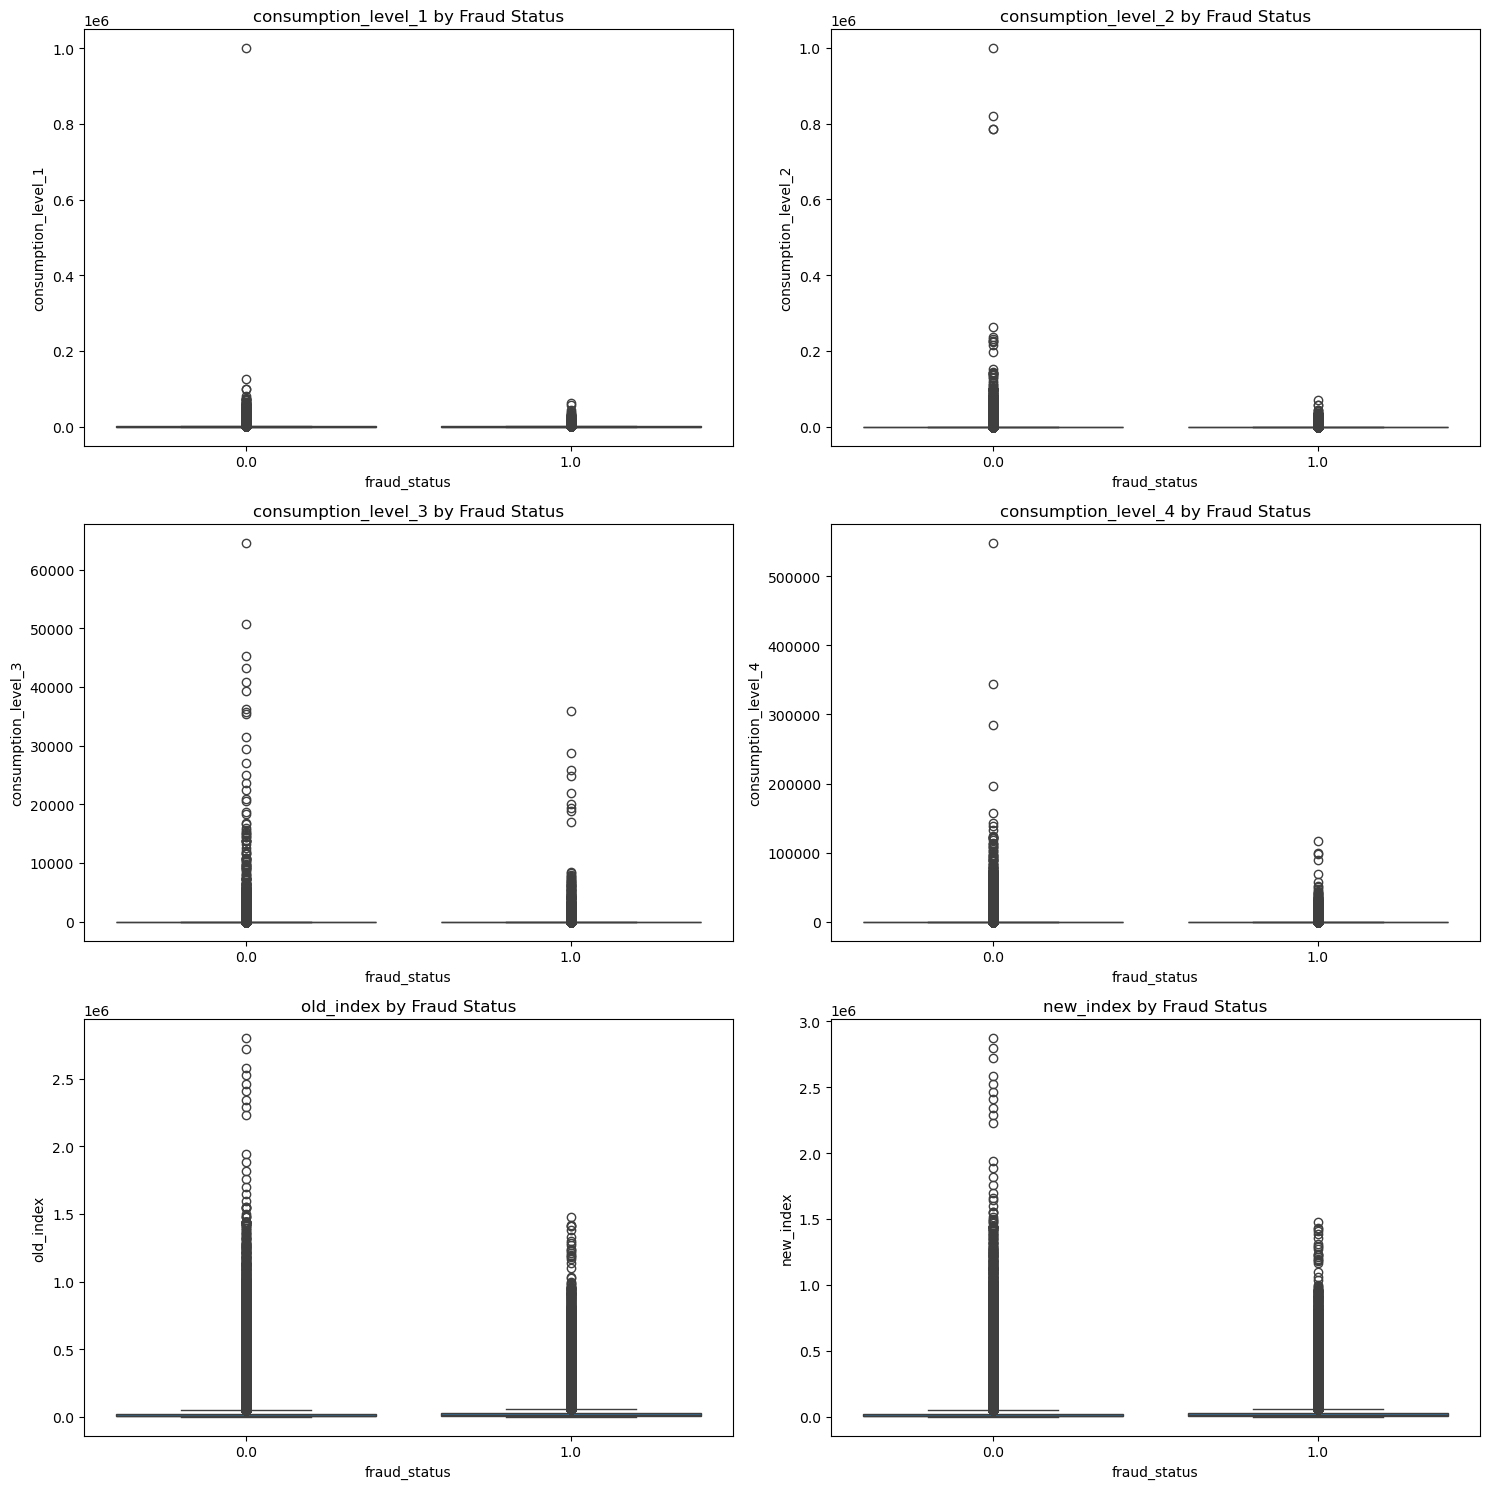

In [33]:
temp_df = pd.merge(invoice_train, client_train[['client_id', 'fraud_status']], on='client_id')

features = ['consumption_level_1', 'consumption_level_2', 'consumption_level_3', 
            'consumption_level_4', 'old_index', 'new_index']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='fraud_status', y=feature, data=temp_df, ax=axes[i])
    axes[i].set_title(f"{feature} by Fraud Status")

plt.tight_layout()
plt.show()

We also take a look at the consumption over time for a sample fraud client and non-fraud client. Based on the graphs, it is hard to tell how consumption might be an indicator of frauds. In fact, it appears that the erractic movement of the second plot might be more reasonable in declaring that client as fraud, yet the client is non-fraudulent. This brings us back to the limitation that clients are characterised as a whole for fraud/non-fraud status, rather than each individual invoice.

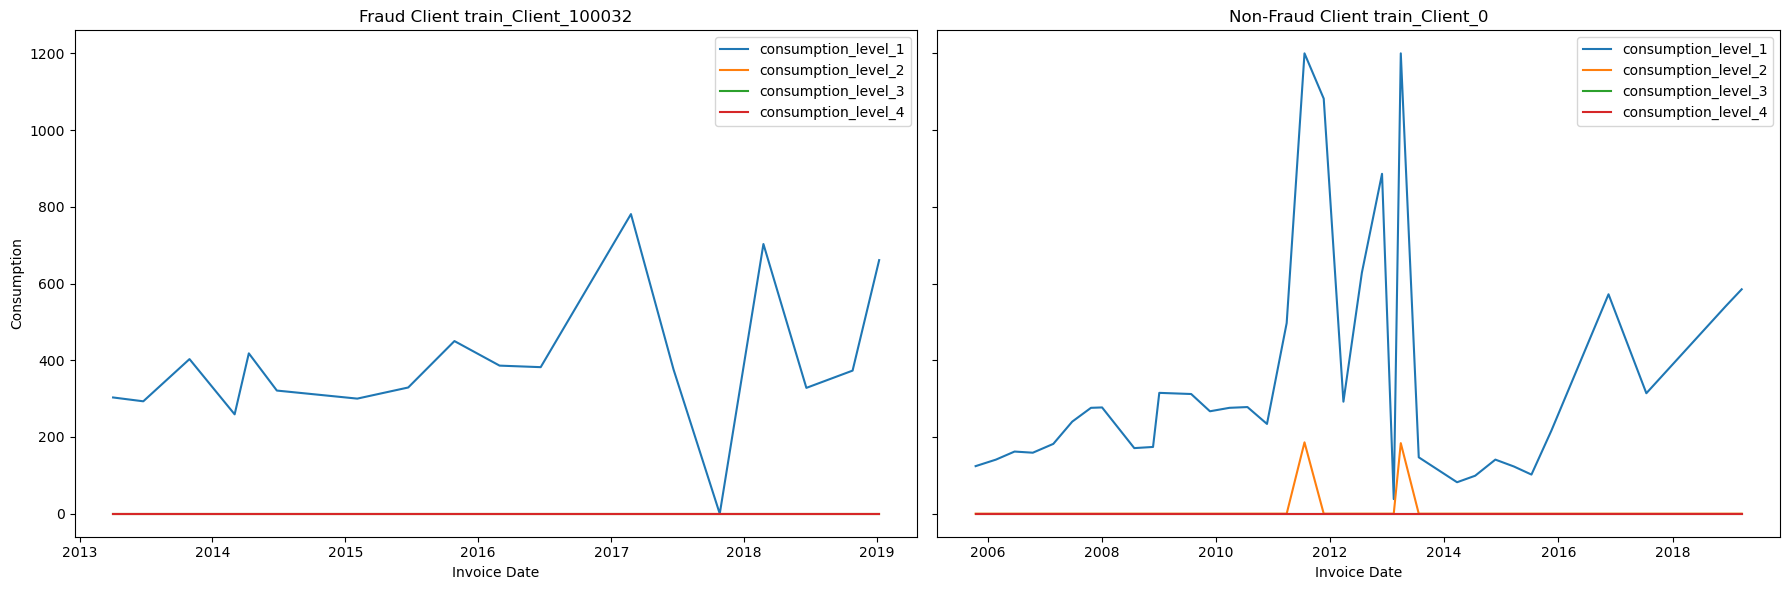

In [34]:
# Sample fraud client data
sample_fraud_client_id = client_train[client_train['fraud_status'] == 1]['client_id'].values[0]
sample_fraud_client_data = invoice_train[invoice_train['client_id'] == sample_fraud_client_id].sort_values('invoice_date')

# Sample non-fraud client data
sample_non_fraud_client_id = client_train[client_train['fraud_status'] == 0]['client_id'].values[0]
sample_non_fraud_client_data = invoice_train[invoice_train['client_id'] == sample_non_fraud_client_id].sort_values('invoice_date')

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Fraud client plot
axes[0].plot(sample_fraud_client_data['invoice_date'], sample_fraud_client_data['consumption_level_1'], label='consumption_level_1')
axes[0].plot(sample_fraud_client_data['invoice_date'], sample_fraud_client_data['consumption_level_2'], label='consumption_level_2')
axes[0].plot(sample_fraud_client_data['invoice_date'], sample_fraud_client_data['consumption_level_3'], label='consumption_level_3')
axes[0].plot(sample_fraud_client_data['invoice_date'], sample_fraud_client_data['consumption_level_4'], label='consumption_level_4')
axes[0].set_title(f'Fraud Client {sample_fraud_client_id}')
axes[0].set_xlabel('Invoice Date')
axes[0].set_ylabel('Consumption')
axes[0].legend()

# Non-fraud client plot
axes[1].plot(sample_non_fraud_client_data['invoice_date'], sample_non_fraud_client_data['consumption_level_1'], label='consumption_level_1')
axes[1].plot(sample_non_fraud_client_data['invoice_date'], sample_non_fraud_client_data['consumption_level_2'], label='consumption_level_2')
axes[1].plot(sample_non_fraud_client_data['invoice_date'], sample_non_fraud_client_data['consumption_level_3'], label='consumption_level_3')
axes[1].plot(sample_non_fraud_client_data['invoice_date'], sample_non_fraud_client_data['consumption_level_4'], label='consumption_level_4')
axes[1].set_title(f'Non-Fraud Client {sample_non_fraud_client_id}')
axes[1].set_xlabel('Invoice Date')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Index Levels

Here, we dive a little deeper into new_index and old_index. Essentially, the sum of all 4 consumption_levels should equate to the difference between old_index and new_index. I.e, old_index refers to the old meter reading and new_index refers to the new meter reading. Through this inspection, we unconvered some key details to take into account while handling these index variables.

Firstly, we did a quick check to see how many invoices had tallied consumption and index levels. Through this first check, we realised that there were some negative differences in indexes, which was particularly weird. This meant that after old_index passes a certain threshold, it will restart from 0 and continue the meter reading from there. We realised that some meters have this threshold as 100,000, and some meters have this threshold as 1,000,000.

In [35]:
# Create a copy of the invoice_train dataset
temp_df = pd.merge(invoice_train, client_train[['client_id', 'fraud_status']], on='client_id')

# Calculate sum of consumption which should equal the difference in index levels
temp_df['total_consumption'] = temp_df['consumption_level_1'] + temp_df['consumption_level_2'] + temp_df['consumption_level_3'] + temp_df['consumption_level_4']

# Apply the function to calculate 'difference_check'
temp_df['difference_in_index'] = temp_df['new_index'] - temp_df['old_index']

temp_df['difference_check'] = temp_df['difference_in_index'] == temp_df['total_consumption']

print(f"No. of invoices with consistent consumption levels: {sum(temp_df['difference_check'])}/{len(temp_df)}")
print(f"No. of discrepancies: {len(temp_df) - sum(temp_df['difference_check'])}")

display(temp_df[~temp_df['difference_check']].head(10))

No. of invoices with consistent consumption levels: 4437332/4456063
No. of discrepancies: 18731


,client_id,invoice_date,tarif_type,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,meter_type,fraud_status,total_consumption,difference_in_index,difference_check
1118,train_Client_100024,2014-06-20,11,482429,0,207,8,1,800,400,318,0,99260,778,4,0,0.00,1518,-98482,False
1213,train_Client_100025,2012-02-17,11,1028965,0,203,6,1,372,0,0,0,6952,7300,4,0,0.00,372,348,False
1859,train_Client_100050,2012-01-25,11,112753,0,413,9,1,2400,543,0,0,7709,7709,8,0,0.00,2943,0,False
2625,train_Client_100075,2008-11-27,11,502690,0,410,6,1,116,0,0,0,0,0,14,0,0.00,116,0,False
2810,train_Client_10008,2015-05-01,11,842528,0,413,9,1,800,400,800,363,99486,1849,4,0,0.00,2363,-97637,False
2857,train_Client_100080,2009-11-06,14,630280,0,413,6,1,5000,0,0,0,3143,3143,18,0,0.00,5000,0,False
2995,train_Client_100083,2012-02-16,40,6788434,0,5,8,1,204,0,0,0,1469,1469,12,1,1.00,204,0,False
5243,train_Client_100144,2012-06-04,11,543494,0,207,6,1,600,99398,0,0,19772,19770,2,0,0.00,99998,-2,False
5564,train_Client_100151,2012-06-02,11,1211160,0,203,8,1,616,0,0,0,23853,24347,4,0,0.00,616,494,False
5735,train_Client_100157,2018-12-02,11,35572,0,420,9,1,800,400,800,4086,97099,3185,4,0,0.00,6086,-93914,False


In [36]:
print(temp_df['difference_in_index'].describe())

count   4456063.00
mean        584.23
std        4615.20
min     -999096.00
25%          80.00
50%         311.00
75%         658.00
max      633228.00
Name: difference_in_index, dtype: float64


In this second check, we account for these thresholds and conduct the same check. However, there are still many discrepancies in the index levels, which amount to 17023 invoices.

In [37]:
# Create a copy of the invoice_train dataset
temp_df = pd.merge(invoice_train, client_train[['client_id', 'fraud_status']], on='client_id')

# Calculate sum of consumption which should equal the difference in index levels
temp_df['total_consumption'] = temp_df['consumption_level_1'] + temp_df['consumption_level_2'] + temp_df['consumption_level_3'] + temp_df['consumption_level_4']

def calculate_difference(row):

    total_sum = row['old_index'] + row['total_consumption']
    
    # Check which threshold to apply
    if row['old_index'] <= 100000:  # Handle 100,000 threshold
        if row['new_index'] < row['old_index']:
            return row['new_index'] + 100000 - row['old_index']
        else:
            return row['new_index'] - row['old_index']
    elif row['old_index'] <= 1000000:  # Handle 1,000,000 threshold
        if row['new_index'] < row['old_index']:
            return row['new_index'] + 1000000 - row['old_index']
        else:
            return row['new_index'] - row['old_index']
    else:  # Default case (values greater than 1,000,000, if any)
        return row['new_index'] - row['old_index']

# Apply the function to calculate 'difference_check'
temp_df['difference_in_index'] = temp_df.apply(calculate_difference, axis=1)

temp_df['difference_check'] = temp_df['difference_in_index'] == temp_df['total_consumption']

print(f"No. of invoices with consistent consumption levels: {sum(temp_df['difference_check'])}/{len(temp_df)}")
print(f"No. of discrepancies: {len(temp_df) - sum(temp_df['difference_check'])}")

display(temp_df[~temp_df['difference_check']].head(10))

No. of invoices with consistent consumption levels: 4439040/4456063
No. of discrepancies: 17023


,client_id,invoice_date,tarif_type,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,meter_type,fraud_status,total_consumption,difference_in_index,difference_check
1213,train_Client_100025,2012-02-17,11,1028965,0,203,6,1,372,0,0,0,6952,7300,4,0,0.00,372,348,False
1859,train_Client_100050,2012-01-25,11,112753,0,413,9,1,2400,543,0,0,7709,7709,8,0,0.00,2943,0,False
2625,train_Client_100075,2008-11-27,11,502690,0,410,6,1,116,0,0,0,0,0,14,0,0.00,116,0,False
2857,train_Client_100080,2009-11-06,14,630280,0,413,6,1,5000,0,0,0,3143,3143,18,0,0.00,5000,0,False
2995,train_Client_100083,2012-02-16,40,6788434,0,5,8,1,204,0,0,0,1469,1469,12,1,1.00,204,0,False
5564,train_Client_100151,2012-06-02,11,1211160,0,203,8,1,616,0,0,0,23853,24347,4,0,0.00,616,494,False
6843,train_Client_100191,2012-09-01,40,215297,0,5,6,1,20,0,0,0,157,157,4,1,0.00,20,0,False
6897,train_Client_100194,2008-07-10,40,1906084,0,5,6,1,44,0,0,0,15702,15702,2,1,0.00,44,0,False
6900,train_Client_100194,2009-08-06,40,1906084,0,5,6,1,282,0,0,0,16159,16159,4,1,0.00,282,0,False
7134,train_Client_100203,2010-09-15,11,202594,0,203,6,1,193,0,0,0,27847,27847,4,0,0.00,193,0,False


We then decided to plot a barplot to identify if there are a lot of fraud cases within the invoices with such discrepancies in index levels. While there are a relatively low no. of fraud cases in the invoices where there are discrepancies in the index levels, we chose not to make the appropriate corrections to the index columns as it might still be characterising fraud cases in some way.

<Figure size 1000x1000 with 0 Axes>

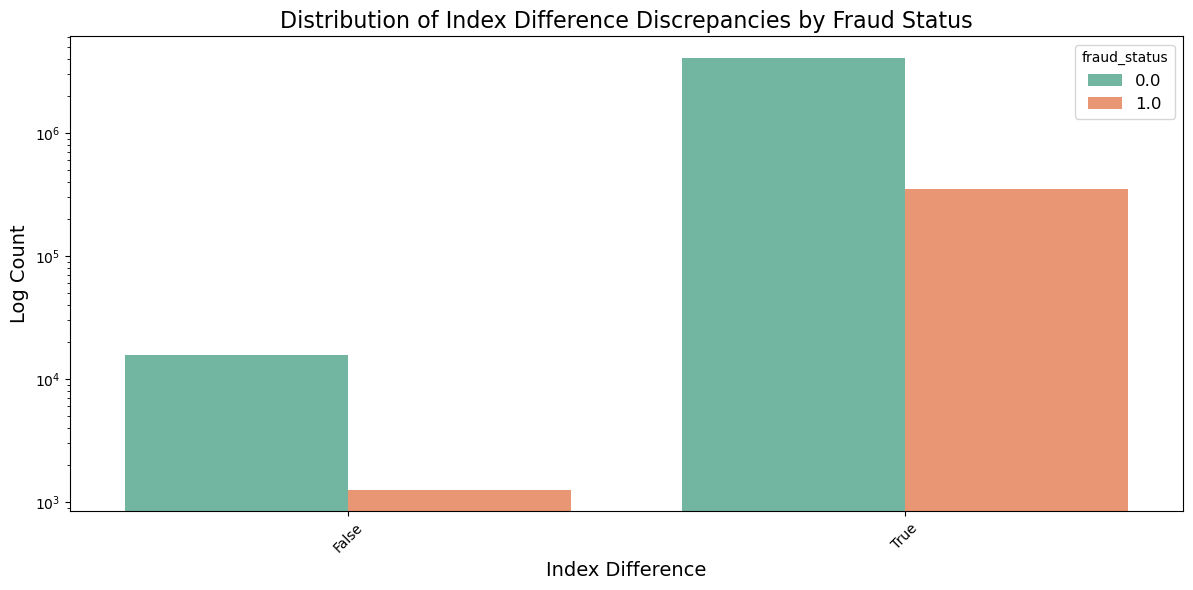

In [38]:
# Distribution of meter_type and fraud_status
plt.figure(figsize=(10, 10))
plot_data = temp_df.groupby(['difference_check', 'fraud_status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="difference_check",
    y="count",
    hue="fraud_status",
    palette="Set2"
)
plt.title("Distribution of Index Difference Discrepancies by Fraud Status", fontsize=16)
plt.xlabel("Index Difference", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="fraud_status", fontsize=12)
plt.tight_layout()
plt.yscale("log")
plt.ylabel("Log Count")
plt.show()

Instead, we will do some feature engineering here to account for the discrepancies. We will create three new columns: total consumption which is the sum of all consumption levels, diff_in_index as carried out above, and is_index_discrepancy which will be a boolean value as to whether the meter indexes tally appropriately.

In [39]:
# Calculate sum of consumption which should equal the difference in index levels
invoice_train['total_consumption'] = invoice_train['consumption_level_1'] + invoice_train['consumption_level_2'] + invoice_train['consumption_level_3'] + invoice_train['consumption_level_4']

def calculate_difference(row):

    total_sum = row['old_index'] + row['total_consumption']
    
    # Check which threshold to apply
    if row['old_index'] <= 100000:  # Handle 100,000 threshold
        if row['new_index'] < row['old_index']:
            return row['new_index'] + 100000 - row['old_index']
        else:
            return row['new_index'] - row['old_index']
    elif row['old_index'] <= 1000000:  # Handle 1,000,000 threshold
        if row['new_index'] < row['old_index']:
            return row['new_index'] + 1000000 - row['old_index']
        else:
            return row['new_index'] - row['old_index']
    else:  # Default case (values greater than 1,000,000, if any)
        return row['new_index'] - row['old_index']

# Apply the function to calculate 'difference_check'
invoice_train['diff_in_index'] = invoice_train.apply(calculate_difference, axis=1)

# Check if the difference in index is equal to the total consumption
invoice_train['is_index_discrepancy'] = invoice_train['diff_in_index'] != invoice_train['total_consumption']

display(invoice_train.head())

,client_id,invoice_date,tarif_type,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,meter_type,total_consumption,diff_in_index,is_index_discrepancy
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0,82,82,False
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0,1384,1384,False
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0,123,123,False
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,0,102,102,False
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,0,572,572,False


# Identifying perfectly correlated variables

We plot a correlation using pearson correlation to identify if there are any perfectly correlated variables amongst the features, especially for anything that might directly distinguish fraud_status. Based on the correlation matrix plotted, we observe that there are 2 sets of variables that are perfectly correlated: meter_type vs tarif_type (1.00) and new_index vs old_index (-0.99).

As for meter_code vs meter_type with a correlation of -0.84, since it's not perfectly correlated, we decided to leave it in the dataset without removing it. This is because it might still contain valuable information. However, we will take note of this high correlation value in any possible feature engineering during model building or the model tuning process. Likewise, it is interesting to note that there is correlation of 0.84 for diff_in_index vs months_number. However, we decided to leave this as well for the same reason.

In [40]:
temp_df = pd.merge(invoice_train, client_train, on='client_id')

# Filtering for the variables of comparison
numerical_data = temp_df.drop(columns=['client_id', 'invoice_date', 'creation_date'])

numerical_data['meter_status'] = pd.to_numeric(numerical_data['meter_status'], errors='coerce').astype('Int64')
numerical_data['fraud_status'] = pd.to_numeric(numerical_data['fraud_status'], errors='coerce').astype('Int64')

# Pearson
corr_pearson = numerical_data.corr(method='pearson')

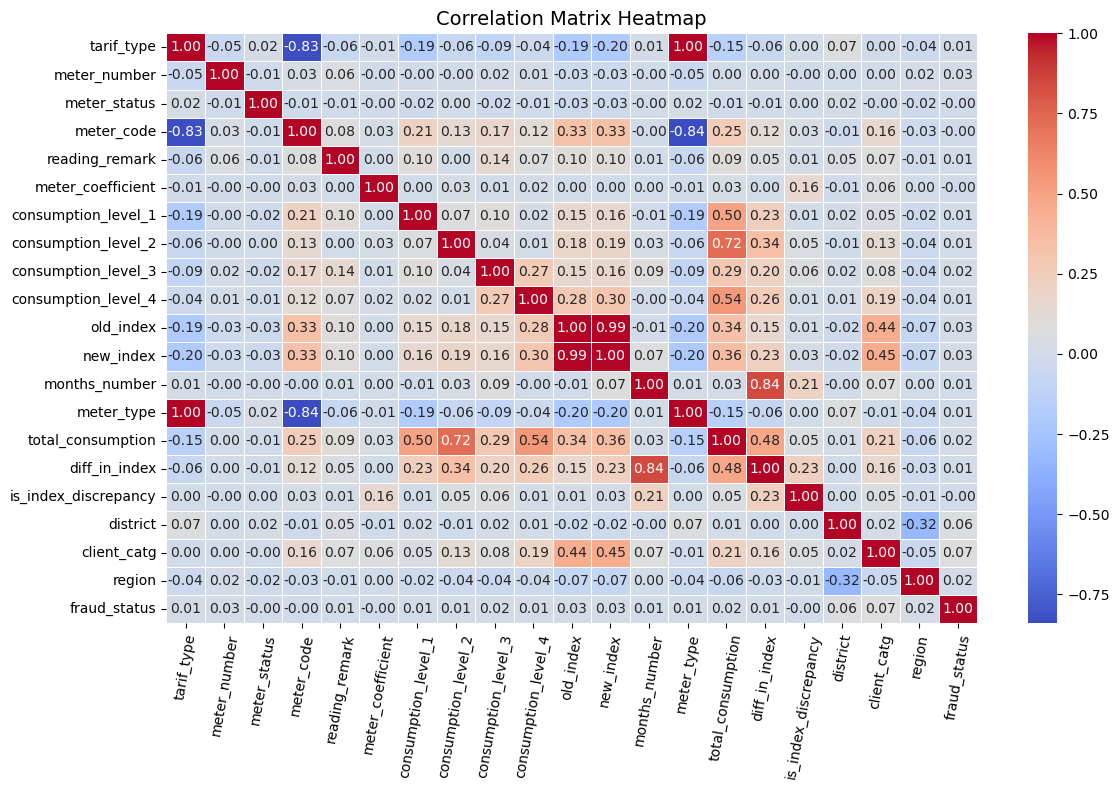

In [41]:
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

# Create the heatmap
heatmap = sns.heatmap(
    corr_pearson,
    annot=True,  # Show correlation values
    fmt=".2f",   # Format the correlation values to 2 decimal places
    cmap="coolwarm",  # Color scheme
    linewidths=0.5,  # Add lines between cells
    cbar=True  # Show the color bar
)

# Add title and adjust label font sizes
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.xticks(fontsize=10, rotation=80)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()  # Automatically adjust layout to prevent overlap

plt.show()

## Tarif_type vs counter_type

From the correlation heatmap, there is a perfect negative correlation (-1.00) between tarif_type and meter_type, indicating that these two features are completely redundant and convey the same information in opposite forms. To avoid multicollinearity and redundant features in the dataset, we decided to remove tarif_type and retain meter_type. We feel like the meter_type provides more interpretable insights of gas and electricity meter types in the context of fraud detection, while the tarif types are not as interpretable. In doing so, we reduce risk of overfitting without losing informational value, and also reduce added features in light of possible one-hot encoding of tarif types.

In [42]:
invoice_train.drop(columns=['tarif_type'], inplace=True)

## Old_index vs New_index

Following the high correlation value, we plotted graphs to examine the relationship between new_index and old_index. In the Log-Transformed distribution, both variables follow a similar pattern and almost align with each other.

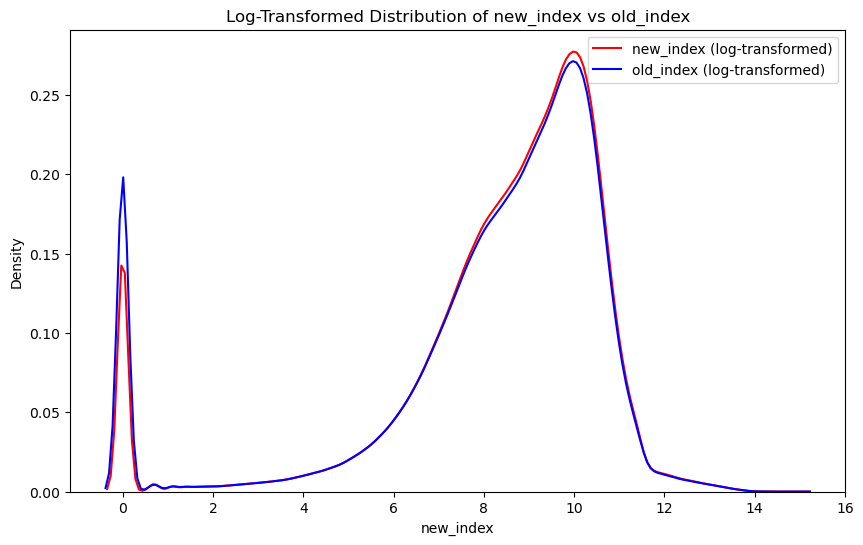

In [43]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.kdeplot(data=np.log1p(invoice_train['new_index']), color='red', label='new_index (log-transformed)')
sns.kdeplot(data=np.log1p(invoice_train['old_index']), color='blue', label='old_index (log-transformed)')
plt.title('Log-Transformed Distribution of new_index vs old_index')
plt.legend()
plt.show()

The smoothed time series graph also shows a similar pattern where they align with each other.

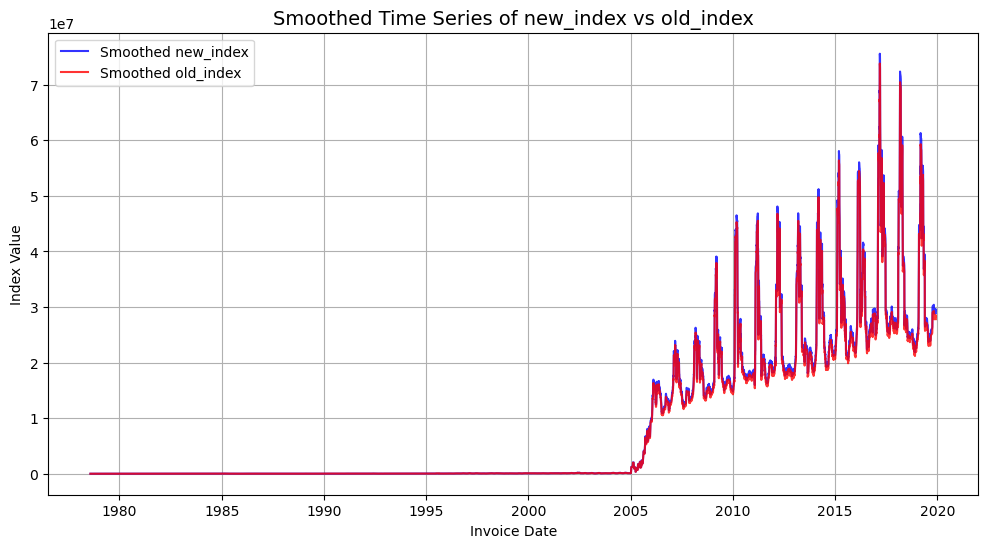

In [44]:
temp_df = invoice_train.groupby('invoice_date').agg({'new_index': 'sum', 'old_index': 'sum'}).reset_index()

# Calculate a rolling mean for smoothing 
temp_df['new_index_rolling'] = temp_df['new_index'].rolling(window=30).mean()
temp_df['old_index_rolling'] = temp_df['old_index'].rolling(window=30).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(temp_df['invoice_date'], temp_df['new_index_rolling'], label='Smoothed new_index', color='blue', alpha=0.8)
plt.plot(temp_df['invoice_date'], temp_df['old_index_rolling'], label='Smoothed old_index', color='red', alpha=0.8)

# Title and labels
plt.title('Smoothed Time Series of new_index vs old_index', fontsize=14)
plt.xlabel('Invoice Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

This implies redundancy in information between the two features, which might lead to multicollinearity issues which potentially inflates coefficient variances or reduce model interpretability. As we had already created a diff_in_index column, we felt like the change in meter readings are already represented through this variable. We can therefore proceed to drop new_index to avoid multicollinearity.

In [45]:
# Drop new_index
invoice_train.drop(columns=['new_index'], inplace=True)

display(invoice_train.head())

,client_id,invoice_date,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,months_number,meter_type,total_consumption,diff_in_index,is_index_discrepancy
0,train_Client_0,2014-03-24,1335667,0,203,8,1,82,0,0,0,14302,4,0,82,82,False
1,train_Client_0,2013-03-29,1335667,0,203,6,1,1200,184,0,0,12294,4,0,1384,1384,False
2,train_Client_0,2015-03-23,1335667,0,203,8,1,123,0,0,0,14624,4,0,123,123,False
3,train_Client_0,2015-07-13,1335667,0,207,8,1,102,0,0,0,14747,4,0,102,102,False
4,train_Client_0,2016-11-17,1335667,0,207,9,1,572,0,0,0,15066,12,0,572,572,False


# Saving the cleaned dataset

As the given test dataset has no target (fraud_status) variable, it means that we will be unable to perform any evaluations against it later on after building our models, as there is no ground truths to check against. Hence, we will only be using the cleaned invoice_train and client_train datasets to proceed forward, where we will later split the data into train, validation and test datasets accordingly.

In [46]:
invoice_train.to_csv('./cleaned_data/cleaned_invoice_train.csv', index=False)
client_train.to_csv('./cleaned_data/cleaned_client_train.csv', index=False)

# Conclusion

Through this exploratory data analysis and data cleaning process, we managed to achieve our main objectives. Here is a summary of our work and findings:

Exploratory Data Analysis:
- We tried to investigate what months_number might mean, but we are still unable to come to a conclusion especially with its heavily skewed distribution. We made an assumption that this was a numerical variable.
- We also investigated on the outliers of index readings and consumption levels, to determine whether they tally correctly. As there were a number of invoices that did not tally, we did not remove those as they might be indicators of fraud. Instead, we created a new column of `is_discrepancy` to indicate rows that did not tally.
- We made the assumption that meter_number and/or code are some indication of the meters used by each client, and they might be shared amongst clients, or be a specific type of meter.

Data Cleaning & preprocessing:
- We renamed columns starting with counter as meter instead for more interpretability. We also made translations and renamed the remaining columns for more readability.
- Cleaned `meter_status` (counter_statue) according to the description provided, which meant 5 distinct statuses. However, we made an assumption to retain the first 5 values. Should more information be provided, we can be more confident of how we should clean this variable.

Generally, there are no obvious indicators of fraud or non-frauds, especially with the low number of fraud cases to begin with. However, this entire process has helped us to determine the type of feature engineering and approach we will want to take in our model building. 
- Firstly, since fraud classification is by client as a whole, we will need to summarise our features by client. This will be for our general models, that tries to analyse trends by clients. As such, we will perform feature aggregation for the numerical variables and perform one hot encoding for the categorical variables. Since there are different no. of invoices per client, we will sum up the no. of rows for some of these one-hot encoded categorical variables as well. More particularly for meter_number and meter_code, we will simply find the no. of unique values that client's invoices contains for each variable, since they have many unique values in them that will not be meaningful to one-hot encode.
- Secondly, we will attempt to use invoice data to predict frauds through Recurrent Neural Networks to analyse trends by invoices. This approach does make more sense in the real world sense, especially because fraudulent clients will have both non-fraud and fraud invoices. By classifying all of a fraudulent client's invoices simply as fraud, there is potential misclassification. Additionally, there is a lot of valuable data stored in sequential data, that we wish to explore through RNN.
